In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
ecom = pd.read_csv("Ecommerce - UK Retailer.csv")

In [3]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Problem Statements:

## Perform Basic EDA

In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
ecom.InvoiceDate=pd.to_datetime(ecom.InvoiceDate)

### a. Boxplot – All Numeric Variables

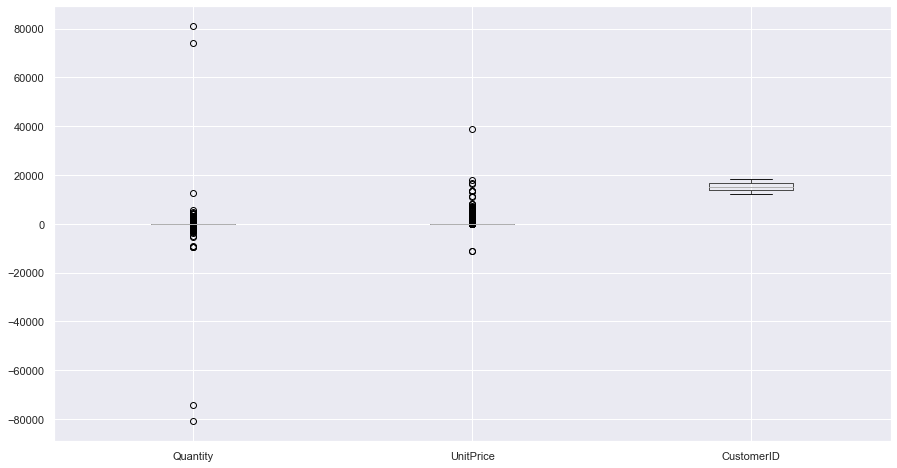

In [6]:
sn.set()
ecom.boxplot(figsize=(15,8))
plt.show()

### b. Histogram – All Numeric Variables 

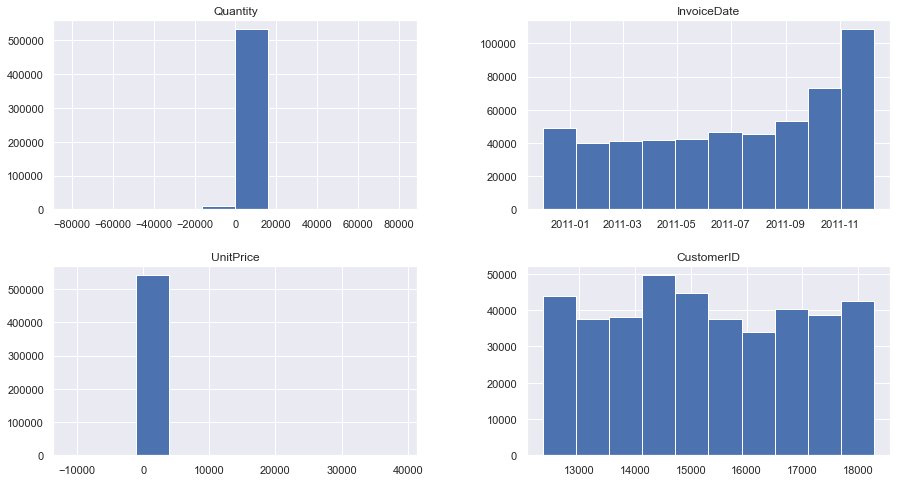

In [7]:
sn.set()
ecom.hist(figsize=(15,8))
plt.show()

### c. Distribution Plot – All Numeric Variables

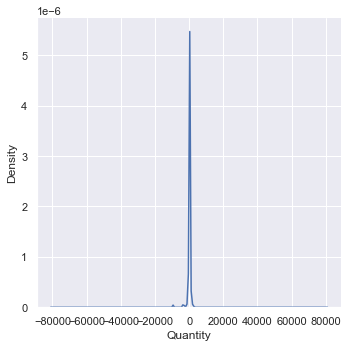

In [8]:
sn.displot(ecom, x='Quantity', kind="kde")

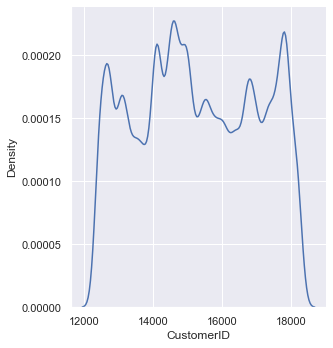

In [9]:
sn.displot(ecom, x='CustomerID', kind="kde")

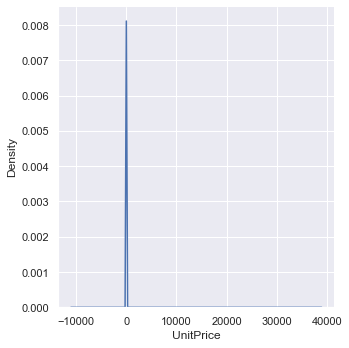

In [10]:
sn.displot(ecom, x='UnitPrice', kind="kde")

### d. Aggregation for all numerical Columns 

In [11]:
ecom.loc[: ,(ecom.dtypes=='int64')|(ecom.dtypes=='float64')].sum()

Quantity      5.176450e+06
UnitPrice     2.498804e+06
CustomerID    6.219476e+09
dtype: float64

In [12]:
ecom.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique Values across all columns 

In [13]:
column_values = ecom[["Quantity", "CustomerID","InvoiceNo","StockCode", "Description","InvoiceDate","UnitPrice", "Country"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

[6 17850.0 '536365' ... Timestamp('2011-12-09 12:49:00') '581587'
 Timestamp('2011-12-09 12:50:00')]


### f. Duplicate values across all columns 

In [14]:
duplicates=ecom[ecom.duplicated()]
duplicates.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables

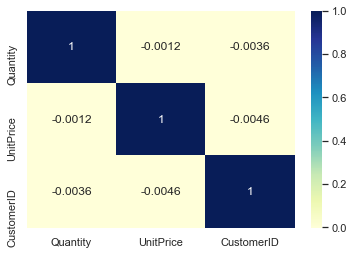

In [15]:
dataplot = sn.heatmap(ecom.corr(), cmap="YlGnBu", annot=True)

### h. Regression Plot - All Numeric Variables 

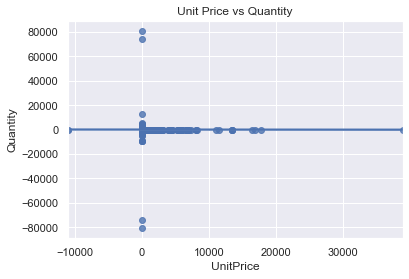

In [16]:
sn.regplot(data=ecom, y='Quantity',x='UnitPrice')
plt.title('Unit Price vs Quantity')
plt.show()

Text(0.5, 1.0, 'Unit Price vs CustomerID')

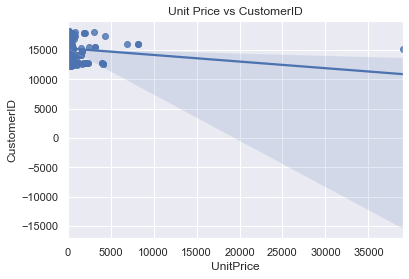

In [17]:
sn.regplot(data=ecom, y='CustomerID',x='UnitPrice')
plt.title('Unit Price vs CustomerID')

Text(0.5, 1.0, 'CustomerID vs Quantity')

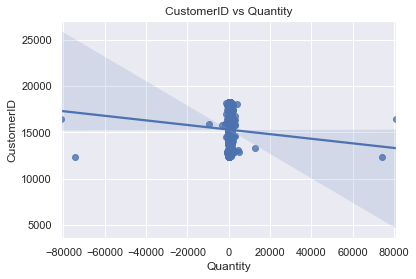

In [18]:
sn.regplot(data=ecom, x='Quantity',y='CustomerID')
plt.title('CustomerID vs Quantity')

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

Text(0.5, 0, 'Average Unit Price')

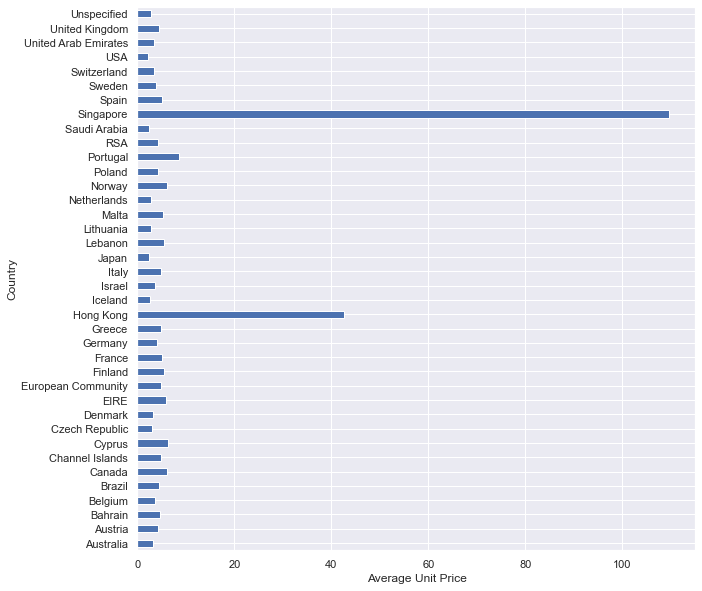

In [19]:
plt.figure(figsize=(10, 10))
ecom.groupby(['Country']).UnitPrice.mean().plot(kind='barh')
plt.xlabel('Average Unit Price')

Text(0, 0.5, 'Number of customers')

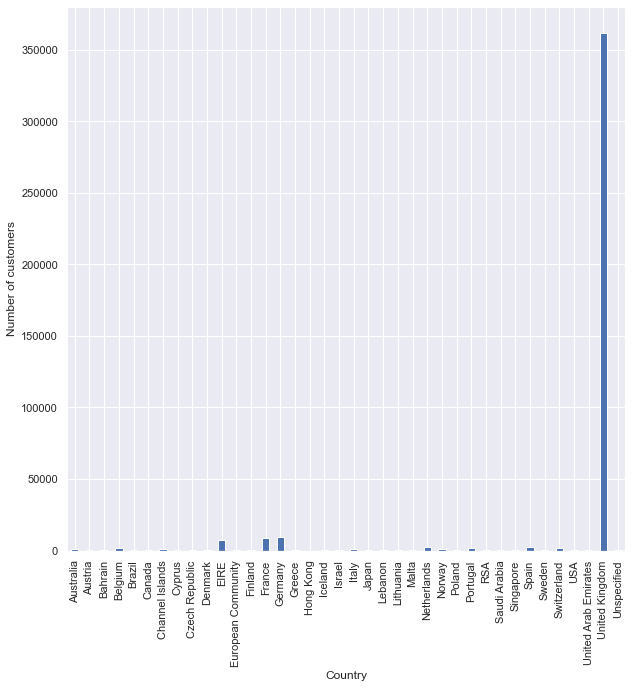

In [20]:
plt.figure(figsize=(10, 10))
ecom.groupby(['Country']).CustomerID.count().plot(kind='bar')
plt.ylabel('Number of customers')

In [21]:
ecom['Amount']=ecom.Quantity*ecom.UnitPrice

<AxesSubplot:xlabel='Country'>

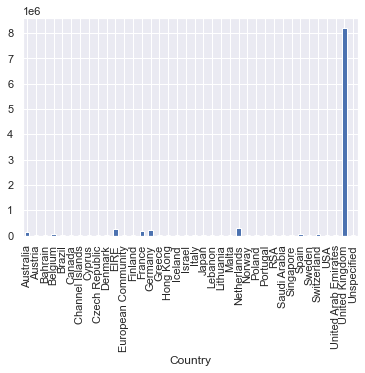

In [22]:
ecom.groupby(['Country']).Amount.sum().plot(kind='bar')

In [23]:
ecom.InvoiceDate=pd.to_datetime(ecom.InvoiceDate)

In [24]:
ecom['Month'] = ecom['InvoiceDate'].dt.month

In [25]:
ecom['Year'] = ecom['InvoiceDate'].dt.year

Text(0, 0.5, 'Amount of Stocks')

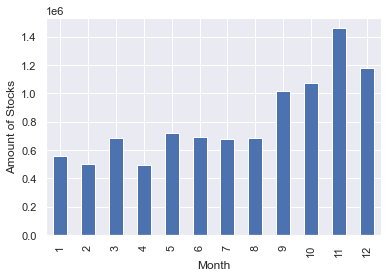

In [26]:
ecom.groupby(['Month']).Amount.sum().plot(kind='bar')
plt.ylabel('Amount of Stocks')

Text(0, 0.5, 'Amount of Stocks')

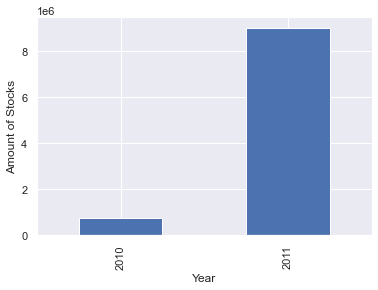

In [27]:
ecom.groupby(['Year']).Amount.sum().plot(kind='bar')
plt.ylabel('Amount of Stocks')

### j. Pair plot - All Numeric Variables

In [28]:
ecom.drop(['Amount','Month','Year'],axis=1,inplace=True)

In [29]:
df=ecom.loc[: ,(ecom.dtypes=='int64')|(ecom.dtypes=='float64')]

In [ ]:
sn.pairplot(df)

### k. Line chart to show the trend of data - All Numeric/Date Variables

In [ ]:
ecom['Amount']=ecom.Quantity*ecom.UnitPrice

In [ ]:
sn.lineplot(x="InvoiceDate", y="Amount", data=ecom)
plt.show()

### l. Plot the skewness - All Numeric Variables 

In [ ]:
ecom.skew(axis=0,numeric_only=True)

In [ ]:

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sn.distplot(ecom.Quantity, color="skyblue", ax=axes[0,0])
sn.distplot(ecom.UnitPrice, color="olive", ax=axes[0,1])
sn.distplot(ecom.Amount, color="teal", ax=axes[1,0])


### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [ ]:
ecom.isnull().sum()

In [ ]:
ecom.CustomerID.nunique()

In [ ]:
ecom.CustomerID.fillna(ecom.CustomerID.mode()[0],inplace = True)

In [ ]:
ecom.Description.fillna(ecom.Description.mode()[0],inplace = True)

In [ ]:
ecom.isnull().sum()

### 3. Remove duplicate rows 

In [ ]:
ecom.duplicated().sum()

In [ ]:
ecom.drop_duplicates(subset=None, keep='first',inplace=True)

In [ ]:
ecom.duplicated().sum()

### 4. Remove rows which have negative values in Quantity column

In [ ]:
ecom.Quantity[ecom.Quantity<0].count()

In [ ]:
indexNames = ecom[ ecom['Quantity'] < 0 ].index
ecom.drop(indexNames , inplace=True)

In [ ]:
ecom.Quantity[ecom.Quantity<0].count()

### 5. Add the columns - Month, Day and Hour for the invoice 

In [ ]:
ecom.InvoiceDate=pd.to_datetime(ecom.InvoiceDate)

In [ ]:
ecom['Month'] = ecom['InvoiceDate'].dt.month

In [ ]:
ecom['Day'] = ecom['InvoiceDate'].dt.day

In [ ]:
ecom['Hour'] = ecom['InvoiceDate'].dt.hour

In [ ]:
ecom.tail()

### 6. How many orders made by the customers? 

In [ ]:
orders=ecom.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
orders

### 7. TOP 5 customers with higher number of orders 

In [ ]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

### 8. How much money spent by the customers? 

In [ ]:
ecom['Amount']=ecom['UnitPrice']*ecom['Quantity']
ecom

In [ ]:
money_spent=ecom.groupby(by=['CustomerID'], as_index=False)['Amount'].sum()
money_spent

### 9. TOP 5 customers with highest money spent 

In [ ]:
money_spent.sort_values(by=['Amount'], ascending=False).head()

### 10. How many orders per month? 

In [ ]:
'''import calendar
ecom['Month'] = ecom['Month'].apply(lambda x: calendar.month_abbr[x])'''

In [ ]:
orders_per_month=ecom.groupby(by=['Month'], as_index=False)['InvoiceNo'].count()
orders_per_month

### 11. How many orders per day? 

In [ ]:
orders_per_day=ecom.groupby(by=['Day'], as_index=False)['InvoiceNo'].count()
orders_per_day

### 12. How many orders per hour? 

In [ ]:
orders_per_hour=ecom.groupby('Hour')['InvoiceNo'].count().sort_values(ascending=False)
orders_per_hour

### 13. How many orders for each country? 

In [ ]:
orders_per_country = ecom.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
orders_per_country

### 14. Orders trend across months 

In [ ]:
orders_per_month.plot(kind="line", xlabel= "Month", ylabel="Orders", title= "Number of Orders per Month", legend=False)

### 15. How much money spent by each country?

In [ ]:
amount_per_country = ecom.groupby('Country')['Amount'].count().sort_values(ascending=False)
amount_per_country